<p style="text-align:center; color:#708090; font-size:50px;text-decoration:underline"> AMAZON EDA </p>

## Load Data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv("Amazon.csv")

## Basic Understanding

In [52]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [57]:
df.describe()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


In [59]:
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

OrderID          0
OrderDate        0
CustomerID       0
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64

## <span style="color:seagreen">**Dataset is clean with no major missing values and duplicates.**</span>

## Convert Date Column

In [80]:
df['OrderDate']=pd.to_datetime(df['OrderDate'])
df['Year']=df['OrderDate'].dt.year
df['Month']=df['OrderDate'].dt.month_name()

## Monthly Sales Trend

In [82]:
pivot=df.pivot_table(
    index='Month',
    columns='Year',
    values='TotalAmount',
    aggfunc='sum'
)

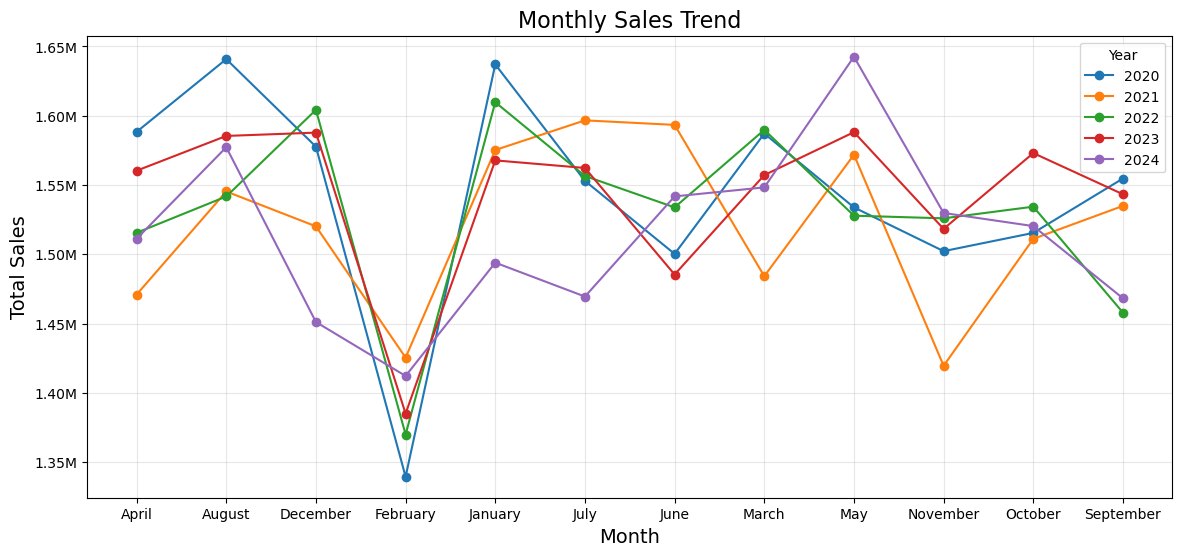

In [126]:
import matplotlib.ticker as mtick
plt.figure(figsize=(14,6))

for year in pivot.columns:
    plt.plot(pivot.index,pivot[year],marker='o',label=year)

plt.title('Monthly Sales Trend',fontsize=16)
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.2f}''M')
)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.show()

## <span style="color:seagreen">**Sales show seasonal fluctuations with consistent overall growth.**</span>

## Category-wise Sales

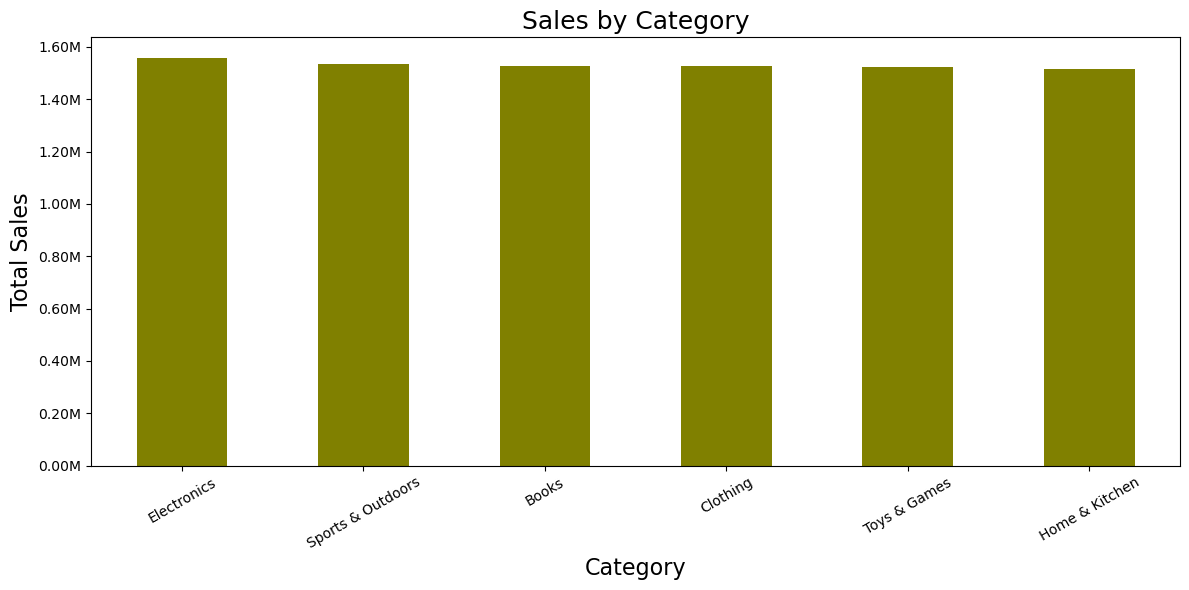

In [180]:
category_sales=(df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False))

import matplotlib.ticker as mtick

plt.figure(figsize=(12,6))
category_sales.plot(kind='bar',color='olive')
plt.title('Sales by Category',fontsize=18)
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e7:.2f}''M')
)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Total Sales',fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## <span style="color:seagreen">**Sales are relatively balanced across categories, with Electronic and Toys & Games slightly leading, indicating diversified consumer demand rather than dependency on a single category.**</span>

## Order Status Distribution

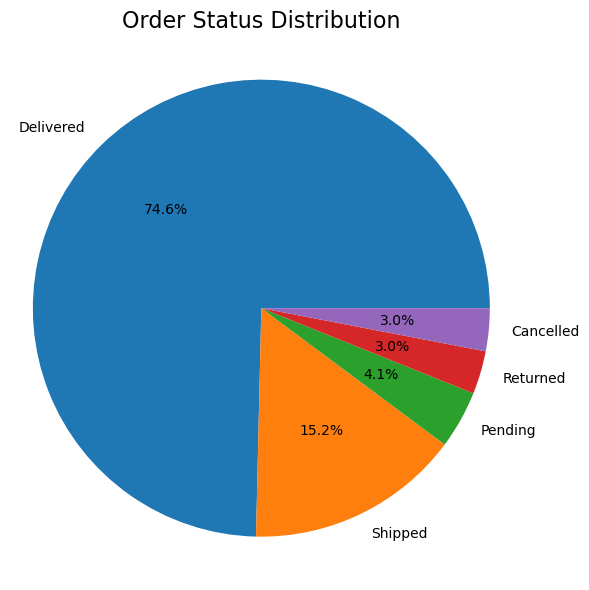

In [244]:
status_count=df['OrderStatus'].value_counts()

plt.figure(figsize=(6,6))
status_count.plot(kind='pie',autopct='%1.1f%%')
plt.title('Order Status Distribution',fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

## <span style="color:seagreen">**Most orders are delivered successfully and only a small percentage are cancelled or returned, showing strong operational performance.**</span>

## Discount VS Sales Relationship 

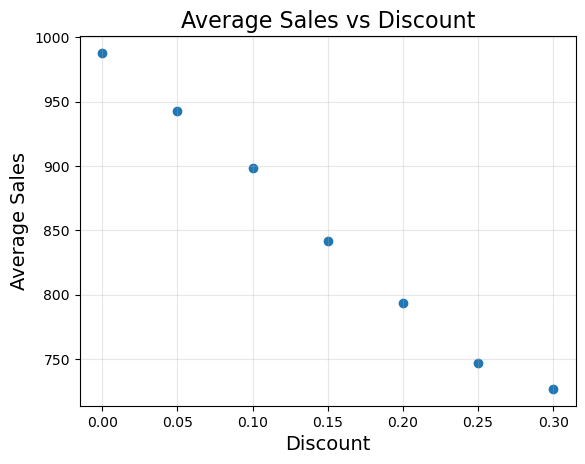

In [241]:
discount_sales=df.groupby('Discount')['TotalAmount'].mean()

plt.figure()
plt.scatter(discount_sales.index,discount_sales.values)
plt.title('Average Sales vs Discount',fontsize=16)
plt.xlabel('Discount',fontsize=14)
plt.ylabel('Average Sales',fontsize=14)
plt.grid(alpha=0.3)
plt.show()

## <span style="color:seagreen">**Moderate discounts are associated with higher average sales.**</span>